In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

*** Welcome to AppliedStatistics ***

Author: Angelo Valleriani
Affiliation: Max Planck Institute of Colloids and Interfaces
Contact: angelo.valleriani@mpikg.mpg.de
License: unlicensed (http://unlicense.org/)

Best use as: >>>import AppliedStatistics as appst

You are using AppliedStatistics version 2.1.2


#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## Histograms

### Exercise 1 

In [2]:
# (6.1-1)
x = np.array([1.1,0.9,1.4,1.1,1.0])
x_bar = np.mean(x)
s2 = np.var(x,ddof=1) # nb: ddof = 1 means: divide by N-1
s = np.sqrt(s2)
print("Sample mean:", x_bar.round(3), "seconds")
print("Sample variance:",s2.round(3), "seconds^2")
print("Sample standard deviation:", s.round(3), "seconds")


Sample mean: 1.1 seconds
Sample variance: 0.035 seconds^2
Sample standard deviation: 0.187 seconds


### Exercise 2

In this exercise we analyze the data concerning the melting point (in degree Celsius) of fifty randomly selected alloy filaments.

In [3]:
# 6.1-4
data = pd.read_csv('Exercise2.csv')
print("The first five measurements are:") 
print(data.head())
print()
print("The last five measurements are:") 
print(data.tail())

The first five measurements are:
     x
0  320
1  326
2  325
3  318
4  322

The last five measurements are:
      x
45  325
46  328
47  319
48  310
49  324


This shows the density histogram



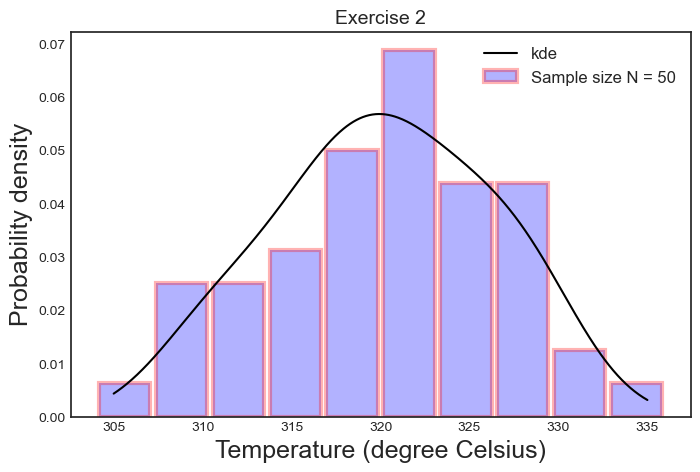

In [4]:
data = np.array(data)
N = len(data)
# part a
print("This shows the density histogram")
print()
results_histo = appst.density_histogram(data,plotfig=True,nbins = 10, kde = True,\
                            label='Melting temperatures (C)', title='Exercise 2', xlabel = "Temperature (degree Celsius)")
print()

Now we look at the frquency histogram and some of its disadvantages. First look at the data produced as output from the appst.density_histogram() routine. 

In [5]:
print("The keys of the dictionary are:")
print(results_histo.keys())

The keys of the dictionary are:
dict_keys(['height', 'position', 'width'])


In [6]:
for key in results_histo.keys():
    print("The ", key, "of the bars is:")
    print(results_histo[key])
    print()

The  height of the bars is:
[0.00625 0.025   0.025   0.03125 0.05    0.06875 0.04375 0.04375 0.0125
 0.00625]

The  position of the bars is:
[305.6 308.8 312.  315.2 318.4 321.6 324.8 328.  331.2 334.4]

The  width of the bars is:
[3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2]



We can use the output of the routine to get back the frequency in each bin, if necessary.

In [7]:
frequency = results_histo["height"]*results_histo["width"]*N
print("The frequency on each bin is:")
print(frequency)

The frequency on each bin is:
[ 1.  4.  4.  5.  8. 11.  7.  7.  2.  1.]


Remember to print the sample size, reduce the bin size to improve the quality of the representation. The title does not need to be used in publications, but may be quite useful in presentations. Adjust the fonts to improve readability.

In [8]:
plt.figure(figsize = (5,3))
# reduce a bit the width to improve the image
plt.bar(results_histo["position"], \
        frequency,\
        width = results_histo["width"]-0.07, \
        label = 'Sample size N = '+str(N),\
       facecolor='g',edgecolor='k')
plt.title("Frequency histogram", fontsize = 18)
plt.xlabel("Temperature (Celsius)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.legend(loc='best', fontsize = 8)
plt.show()

Here we choose some bins of unequal size. 

In [9]:
bins = [302, 306, 310, 320, 350]  # bins of unequal size, see how to feed the routine with self-made bins
results_histo2 = appst.density_histogram(data,plotfig=False,bins = bins,\
                            label='Melting temperatures (C)', title='Exercise 2', \
                                         xlabel = "Temperature (degree Celsius)")

In [10]:
frequency = results_histo2["height"]*results_histo2["width"]*N
print(frequency)

[ 1.  2. 19. 28.]


In [11]:
plt.figure(figsize = (8,5))
plt.bar(results_histo2["position"], frequency, width = results_histo2["width"]-0.07, \
        label = 'Sample size N ='+str(N))
plt.title("Frequency histogram", fontsize = 18)
plt.xlabel("Temperature (Celsius)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.legend(loc='best', fontsize = 12)
plt.show()

The frequency histogram shown above can be quite misleading. Also the relative frequency is not very clear but at least it provides some estimate of the probability to find observations in each of the bins:

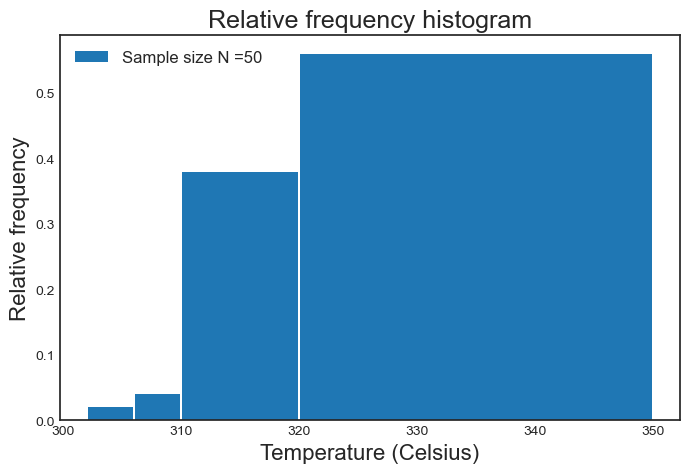

In [12]:
plt.figure(figsize = (8,5))
plt.bar(results_histo2["position"], frequency/N, width = results_histo2["width"]-0.2, \
        label = 'Sample size N ='+str(N))
plt.title("Relative frequency histogram", fontsize = 18)
plt.xlabel("Temperature (Celsius)", fontsize = 16)
plt.ylabel("Relative frequency", fontsize = 16)
plt.legend(loc='best', fontsize = 12)
plt.show()

A much better way to show an histogram is to produce a density histogram:

In [13]:
bins = [302, 306, 310, 320, 350]  # bins of unequal size
results_histo2 = appst.density_histogram(data,plotfig=True,bins = bins,\
                            label='Melting temperatures (C)', \
                                         title='Density histogram', \
                                         xlabel = "Temperature (degree Celsius)")

Nevertheless, histograms remain a descriptive tool of the data. They can be very helpful but their shape depends very much on the choice of the bins. 

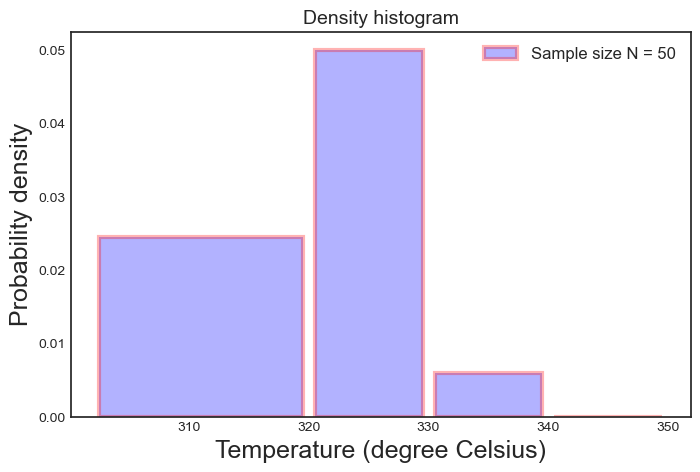

In [14]:
bins = [302, 320, 330, 340, 350]  # bins of unequal size
results_histo2 = appst.density_histogram(data,plotfig=True,bins = bins,\
                            label='Melting temperatures (C)', \
                                         title='Density histogram', \
                                         xlabel = "Temperature (degree Celsius)")

In [15]:
bins = [302, 320, 330, 340, 350]  # bins of unequal size
results_histo2 = appst.density_histogram(data,plotfig=True,bins = bins, kde = True,\
                            label='Melting temperatures (C)', \
                                         title='Density histogram', \
                                         xlabel = "Temperature (degree Celsius)")

In [16]:
import seaborn as sns
plt.figure(figsize = (5,3))
sns.histplot(data = data, stat = 'density', bins = 10, kde = True)
plt.xlabel("Temperature (degree Celsius)", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.legend(loc='best', labels = ["kde", "N = "+str(N)]) # put the labels here
plt.title("Density histogram and KDE")
plt.show()

### Exercise 3

The data contains a sample about the timining of the Old Faithful geyser in the Yellowstone National Park.

In [17]:
# 6.1-9
data = pd.read_csv('Exercise3.csv')
data.head()

STE  DIS  PTM  ATM    DIM
0   706  150   65   72  2.500
1   818  268   89   88  4.467
2   946  140   65   62  2.333
3  1048  300   95   87  5.000
4  1215  101   55   57  1.683

STE = starting time

DIS = duration in seconds

PTM = predicted time until next (minutes)
 
ATM = actual time until next (minutes)

DIM = duration of in minutes

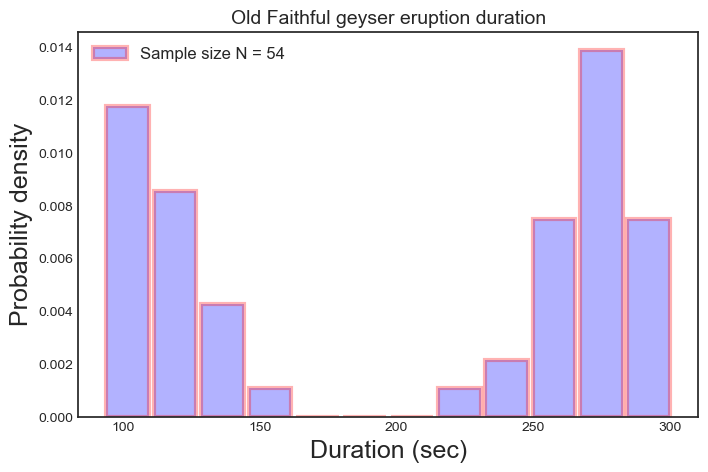

The frequency distribution is: [11.  8.  4.  1.  0.  0.  0.  1.  2.  7. 13.  7.]


In [18]:
time = np.array(data["DIS"])
N_t = len(time)
d_results_t = appst.density_histogram(time, plotfig=True,nbins = 12, \
                            label='Duration (s)', \
                                      title='Old Faithful geyser eruption duration', \
                                      kde=False, xlabel='Duration (sec)')
height, position, width = [d_results_t[i] for i in d_results_t.keys()]
print("The frequency distribution is:", height*width*N_t)

In [19]:
print()
t_bar = np.mean(time)
s_t = np.std(time,ddof=1) # setting ddof=1 gives the estimate std from the sample
print("x_bar =", t_bar.round(3),", s =", s_t.round(3))
print("Median is:", np.median(time))
print()


x_bar = 201.0 , s = 79.445
Median is: 246.5



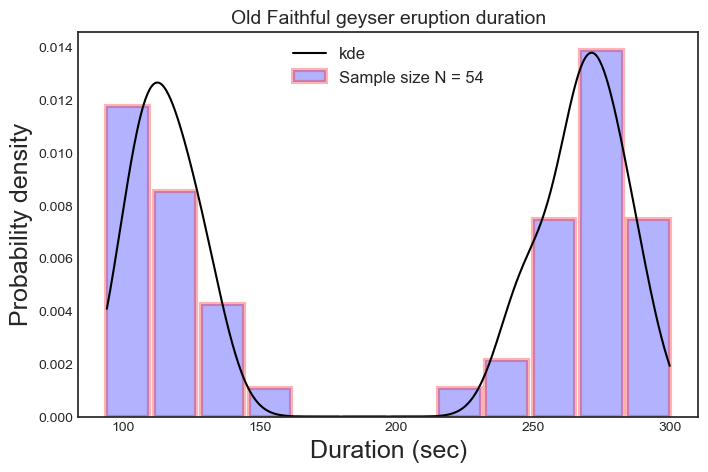

In [20]:
d_results_t = appst.density_histogram(time, plotfig=True,nbins = 12, \
                            label='Duration (s)', \
                                      title='Old Faithful geyser eruption duration', \
                                      kde=True, xlabel='Duration (sec)')

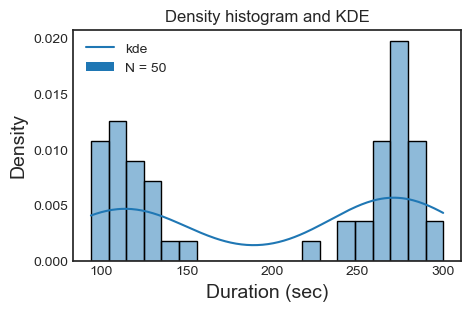

In [21]:
import seaborn as sns
plt.figure(figsize = (5,3))
sns.histplot(data = data["DIS"], stat = 'density', bins = 20, kde = True)
plt.xlabel("Duration (sec)", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.legend(loc='best', labels = ["kde", "N = "+str(N)]) # put the labels here
plt.title("Density histogram and KDE")
plt.show()

## Conclusions

From this unit you have learned how to plot your data in a histogram from frequency, to relative frequency and to density. 

The histogram has an illustrative purpose. Depending on the number and size of the bins, the histogram can look very differently. Do not try to draw easy conclusions from the histogram. Nevertheless, it is a very powerful tool to guide in the further analysis of the data. 

The KDE is a similar tool, perhaps a bit more robust than the histogram. It is good to superimpose the two representations. Here you can see how easy it is to create a plot that includes the KDE.